In [2]:
import numpy as np
from PIL import Image as Img
import matplotlib.pyplot as plt
import cv2
import math

In [3]:
def pad(img):
    h = np.shape(img)[0]
    w = np.shape(img)[1]

    a = (512 - h) // 2
    aa = 512 - a - h

    b = (512 - w) // 2
    bb = 512 - b - w

    return np.pad(img, pad_width=((a, aa), (b, bb)), mode='constant')

In [4]:
im = Img.open('Car.tif')
car = np.asarray(im)
carpad = pad(car)

In [5]:
fft = np.fft.fft2(carpad)
fshift = np.fft.fftshift(fft)
magnitude_spectrum = 20*np.log(np.abs(fshift))

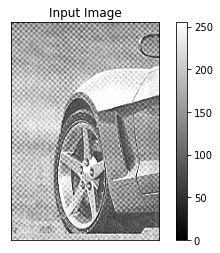

In [7]:
plt.imshow(car, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.colorbar()

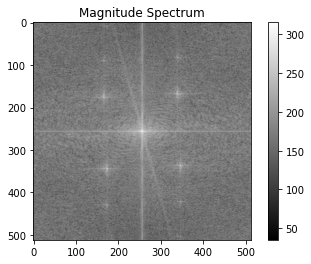

In [9]:
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.colorbar()

In [42]:
u1, v1 = -85, 90
u2, v2 = -85, -180
u3, v3 = -85, -90
u4, v4 = -85, 180

D0 = 15

n = 2

x_axis = np.linspace(-256,255,512)
y_axis = np.linspace(-256,255,512)
[u,v] = np.meshgrid(x_axis,y_axis)

def notch():
    uv = [(u1,v1),(u2,v2),(u3,v3),(u4,v4)]
    Dk = []
    Dk1 = []
    for i in range(4):
        Dk.append(np.sqrt(pow((u-uv[i][0]),2) + pow((v-uv[i][1]),2)))
        Dk1.append(np.sqrt(pow((u+uv[i][0]),2) + pow((v+uv[i][1]),2)))
        if not i:
            f = 1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n))
        else:
            f = f * (1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n)))
            
    return f

/tmp/ipykernel_206543/482704436.py:22: RuntimeWarning: divide by zero encountered in true_divide
  f = 1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n))
/tmp/ipykernel_206543/482704436.py:24: RuntimeWarning: divide by zero encountered in true_divide
  f = f * (1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n)))


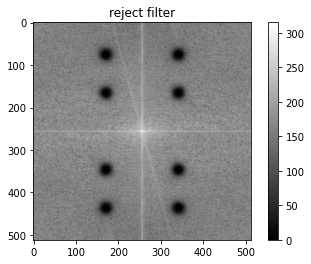

In [43]:
carnotch = notch()
plt.imshow(magnitude_spectrum*carnotch, cmap = 'gray')
plt.title('reject filter')
plt.colorbar()

In [44]:
f_ishift = np.fft.ifftshift(fshift*carnotch)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

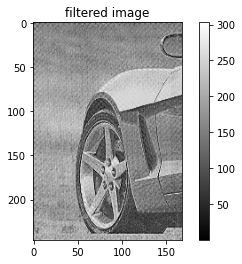

In [45]:
plt.imshow(img_back[133:133+246,172:172+168], cmap = 'gray')
plt.title('filtered image')
plt.colorbar()

In [46]:
im1 = Img.open('Street.png')
st = np.asarray(im1)
stpad = pad(st)

In [47]:
fft = np.fft.fft2(stpad)
fshift = np.fft.fftshift(fft)
magnitude_spectrum = 20*np.log(np.abs(fshift))

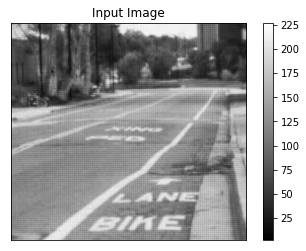

In [49]:
plt.imshow(st, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.colorbar()

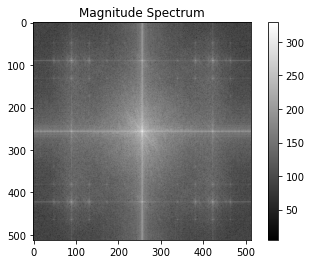

In [50]:
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.colorbar()

In [55]:
u1, v1 = 0, 165
u2, v2 = 165, 0

D0 = 15

n = 2

x_axis = np.linspace(-256,255,512)
y_axis = np.linspace(-256,255,512)
[u,v] = np.meshgrid(x_axis,y_axis)

def notch():
    uv = [(u1,v1),(u2,v2)]
    Dk = []
    Dk1 = []
    for i in range(2):
        Dk.append(np.sqrt(pow((u-uv[i][0]),2) + pow((v-uv[i][1]),2)))
        Dk1.append(np.sqrt(pow((u+uv[i][0]),2) + pow((v+uv[i][1]),2)))
        if not i:
            f = 1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n))
        else:
            f = f * (1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n)))
            
    return f

/tmp/ipykernel_206543/1413998826.py:20: RuntimeWarning: divide by zero encountered in true_divide
  f = 1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n))
/tmp/ipykernel_206543/1413998826.py:22: RuntimeWarning: divide by zero encountered in true_divide
  f = f * (1/(1+np.power(D0/Dk[i],2*n)) * 1/(1+np.power(D0/Dk1[i],2*n)))


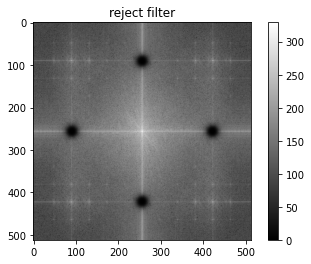

In [56]:
stnotch = notch()
plt.imshow(magnitude_spectrum*stnotch, cmap = 'gray')
plt.title('reject filter')
plt.colorbar()

In [58]:
f_ishift = np.fft.ifftshift(fshift*stnotch)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

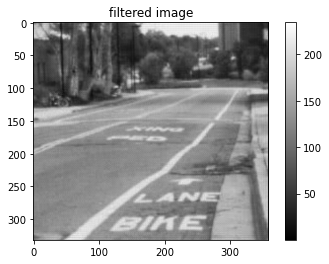

In [60]:
plt.imshow(img_back[90:90+332,77:77+359], cmap = 'gray')
plt.title('filtered image')
plt.colorbar()